In [2]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data.to_csv("../data/AAPL.csv")


[*********************100%***********************]  1 of 1 completed


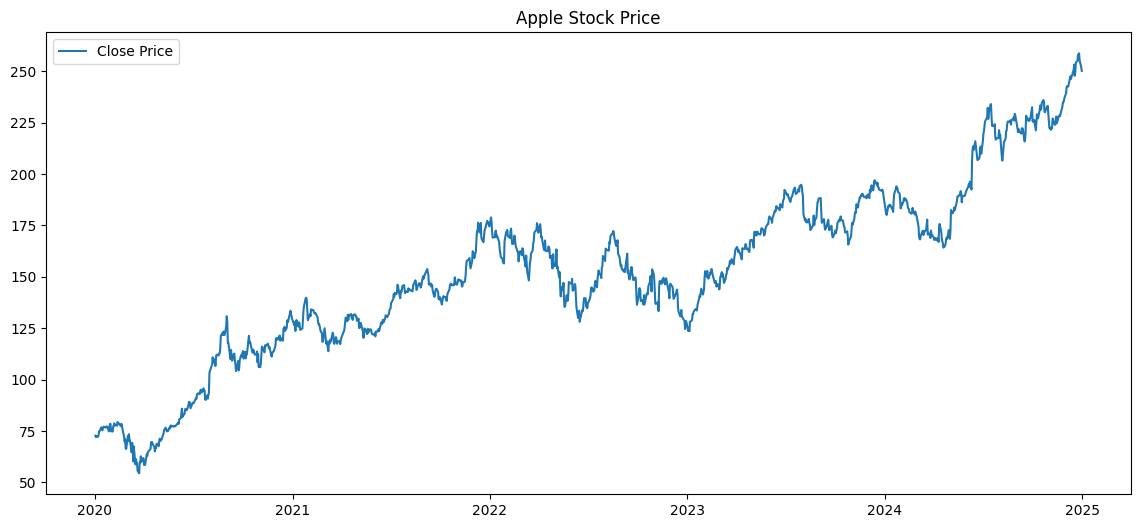

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

data["daily_return"] = data["Close"].pct_change()
data["volatility"] = data["Close"].rolling(window=14).std()

plt.figure(figsize=(14,6))
plt.plot(data["Close"], label="Close Price")
plt.title("Apple Stock Price")
plt.legend()
plt.show()


In [11]:
import sys
import os

sys.path.append(os.path.abspath("../utils"))

from indicators import add_SMA, add_EMA, add_RSI


data = add_SMA(data, 20)
data = add_EMA(data, 20)
data = add_RSI(data, 14)


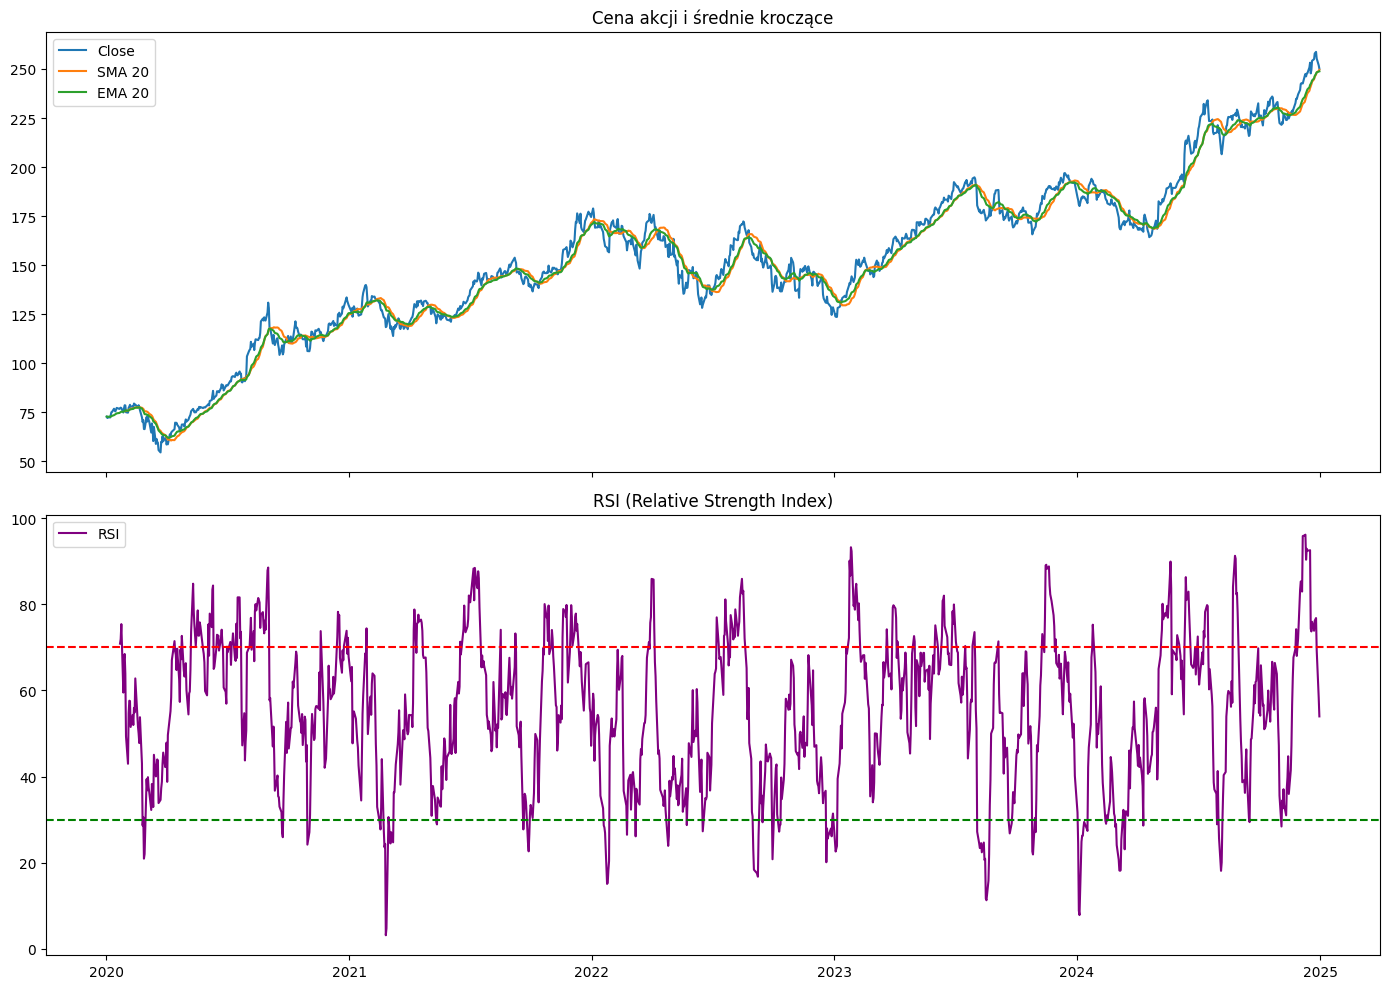

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(14,10), sharex=True)

axs[0].plot(data["Close"], label="Close")
axs[0].plot(data["SMA_20"], label="SMA 20")
axs[0].plot(data["EMA_20"], label="EMA 20")
axs[0].set_title("Cena akcji i średnie kroczące")
axs[0].legend()

axs[1].plot(data["RSI"], label="RSI", color="purple")
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(30, color='green', linestyle='--')
axs[1].set_title("RSI (Relative Strength Index)")
axs[1].legend()

plt.tight_layout()
plt.show()


In [15]:
data.to_csv("../data/AAPL_with_indicators.csv")
